In [10]:
#import libraries
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [34]:
data = pd.read_csv('car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [37]:
data['class'],class_names = pd.factorize(data['class'])

In [38]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [39]:
#Identify the predictor variables and encode any string variables to equivalent integer codes
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [40]:
#check new data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [41]:
#Select the predictor feature and select the target variable
X = data[['buying','maint','doors','persons','lug_boot','safety']]
y = data['class']

In [43]:
from sklearn.model_selection import train_test_split

In [47]:
#train test split
## split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 0)

In [48]:
#training/model fitting
# train the decision tree
## Instantiate the model with 5 neighbors.
model = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
#Evaluate model parameters
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 39


In [51]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [52]:
print(accuracy_score(y_test, y_pred))

0.9248554913294798


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       363
           1       0.89      0.81      0.85       115
           2       0.92      0.69      0.79        16
           3       1.00      0.68      0.81        25

    accuracy                           0.92       519
   macro avg       0.94      0.79      0.85       519
weighted avg       0.93      0.92      0.92       519



In [54]:
#Choosing a K Value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

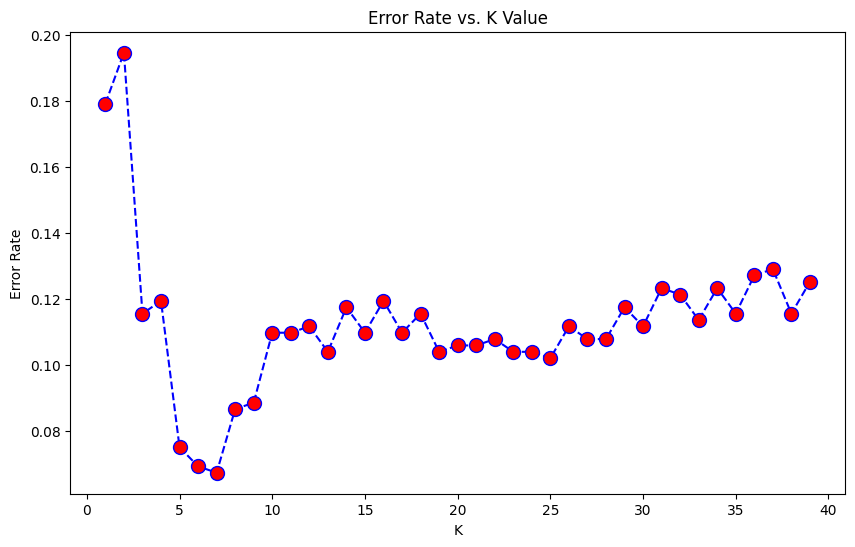

In [55]:
#plotting out error rates with different K values
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
#based on the graph we'll chose K=7 and run the model again:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print('confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('classification report:')
print(classification_report(y_test,y_pred))
print('\n')
print('accuracy score:')
print(accuracy_score(y_test,y_pred))

WITH K=7


confusion matrix:
[[359   4   0   0]
 [ 22  93   0   0]
 [  0   5  11   0]
 [  5   2   1  17]]


classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       363
           1       0.89      0.81      0.85       115
           2       0.92      0.69      0.79        16
           3       1.00      0.68      0.81        25

    accuracy                           0.92       519
   macro avg       0.94      0.79      0.85       519
weighted avg       0.93      0.92      0.92       519



accuracy score:
0.9248554913294798
